# OBJECTIVE:
# Build a model to predict the insurance policy amount


# Importing Libararies.

In [ ]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sb
import warnings 
warnings.simplefilter('ignore')
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the data

In [ ]:
df=pd.read_csv('/content/DS3_C6_S1_Regression_Insurance_Data_Project.csv')

In [ ]:
df

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830
1334,18,female,31.920,OB1,0,no,northeast,2205.98080
1335,18,female,36.850,OB2,0,no,southeast,1629.83350
1336,21,female,25.800,PREO,0,no,southwest,2007.94500


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,1.094918,13270.422265
std,14.958658,6.098187,1.205493,12110.011237
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,190.000000,53.130000,5.000000,63770.428010


# Checking Null values

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

Here we can observe null values so will impute it with mode()

In [ ]:
df['charges'].min()

1121.8739

In [ ]:
df_num_data=df.select_dtypes(include=[np.number])
df_num_data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,0,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [ ]:
for cols in list(df_num_data.columns):
    print(df_num_data[cols].value_counts())
    print('**************************')

 18     69
 19     67
 50     29
 20     29
 45     29
 48     29
 51     29
 52     29
 47     29
 46     29
 25     28
 22     28
 28     28
 53     28
 21     28
 54     28
 24     28
 26     28
 49     28
 27     28
 23     28
 42     27
 30     27
 41     27
 31     27
 29     27
 44     27
 43     27
 40     27
 56     26
 55     26
 32     26
 34     26
 57     26
 33     25
 39     25
 38     25
 36     25
 35     25
 59     25
 37     25
 58     23
 63     23
 62     23
 60     23
 61     22
 64     22
 0       2
-58      1
 190     1
-1       1
Name: age, dtype: int64
**************************
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
**************************
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
**************************
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
197

# Here we can see there are some values in age which are have '-' values so will remove it.also will impute null values with mode for classif columns and will replace 0 and 190 age with mean value

In [ ]:
df

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830
1334,18,female,31.920,OB1,0,no,northeast,2205.98080
1335,18,female,36.850,OB2,0,no,southeast,1629.83350
1336,21,female,25.800,PREO,0,no,southwest,2007.94500


In [ ]:
 df=df.replace(-1, 1,)

In [ ]:
 df=df.replace(-58, 58,)

In [ ]:
df['age']=df['age'].replace(to_replace=0,value=round(df['age'].mean()))
df['classif']=df['classif'].replace(to_replace=np.NaN,value=df['classif'].mode()[0])
df['age']=df['age'].replace(to_replace=190,value=round(df['age'].mean()))

In [ ]:
df

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,39,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830
1334,18,female,31.920,OB1,0,no,northeast,2205.98080
1335,18,female,36.850,OB2,0,no,southeast,1629.83350
1336,21,female,25.800,PREO,0,no,southwest,2007.94500


# Removed the negative value.

In [ ]:
df_cat_data=df.select_dtypes(exclude=[np.number])
df_cat_data

,sex,classif,smoker,region
0,female,PREO,yes,southwest
1,male,OB1,no,southeast
2,male,OB1,no,southeast
3,male,N,no,northwest
4,male,PREO,no,northwest
...,...,...,...,...
1333,male,OB1,no,northwest
1334,female,OB1,no,northeast
1335,female,OB2,no,southeast
1336,female,PREO,no,southwest


In [ ]:
for cols in list(df_cat_data.columns):
    print(df_cat_data[cols].value_counts())
    print('**************************')

male      676
female    662
Name: sex, dtype: int64
**************************
OB1     395
PREO    383
N       226
OB2     224
OB3      91
UW       19
Name: classif, dtype: int64
**************************
no     1064
yes     274
Name: smoker, dtype: int64
**************************
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
**************************


# As checked there is no null values.

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
classif      object
children      int64
smoker       object
region       object
charges     float64
dtype: object

# As checked there are four non numeric columns ,so let convert it into numeric one.

In [ ]:
df.sex=df.sex.astype('category')
df.region=df.region.astype('category')
df.smoker=df.smoker.astype('category')
df.classif=df.classif.astype('category')

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['sex_encoded']=label_encoder.fit_transform(df['sex']) 
df['region_encoded']=label_encoder.fit_transform(df['region'])
df['smoker_encoded']=label_encoder.fit_transform(df['smoker'])
df['classif_encoded']=label_encoder.fit_transform(df['classif'])

In [ ]:
df

,age,sex,bmi,classif,children,smoker,region,charges,sex_encoded,region_encoded,smoker_encoded,classif_encoded
0,19,female,27.900,PREO,0,yes,southwest,16884.92400,0,3,1,4
1,18,male,33.770,OB1,1,no,southeast,1725.55230,1,2,0,1
2,28,male,33.000,OB1,3,no,southeast,4449.46200,1,2,0,1
3,39,male,22.705,N,0,no,northwest,21984.47061,1,1,0,0
4,32,male,28.880,PREO,0,no,northwest,3866.85520,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830,1,1,0,1
1334,18,female,31.920,OB1,0,no,northeast,2205.98080,0,0,0,1
1335,18,female,36.850,OB2,0,no,southeast,1629.83350,0,2,0,2
1336,21,female,25.800,PREO,0,no,southwest,2007.94500,0,3,0,4


# Scaling The Data.

In [ ]:
def feature_scale(scale):
    Numerics=['int16','int32','int64','float16','float32','float64']
    new_df=df.select_dtypes(include=Numerics)
    if scale == 'minmax':
        scaler=MinMaxScaler()
    else:
        scaler=StandardScaler()
    df_scaled= pd.DataFrame(scaler.fit_transform(new_df.to_numpy()),columns=new_df.columns)
    return df_scaled
    

In [ ]:
scale='minmax'
scaled_df=feature_scale(scale)
scaled_df

,age,bmi,children,charges,sex_encoded,region_encoded,smoker_encoded,classif_encoded
0,0.285714,0.321227,0.0,0.251611,0.0,1.000000,1.0,0.8
1,0.269841,0.479150,0.2,0.009636,1.0,0.666667,0.0,0.2
2,0.428571,0.458434,0.6,0.053115,1.0,0.666667,0.0,0.2
3,0.603175,0.181464,0.0,0.333010,1.0,0.333333,0.0,0.0
4,0.492063,0.347592,0.0,0.043816,1.0,0.333333,0.0,0.8
...,...,...,...,...,...,...,...,...
1333,0.777778,0.403820,0.6,0.151299,1.0,0.333333,0.0,0.2
1334,0.269841,0.429379,0.0,0.017305,0.0,0.000000,0.0,0.2
1335,0.269841,0.562012,0.0,0.008108,0.0,0.666667,0.0,0.4
1336,0.317460,0.264730,0.0,0.014144,0.0,1.000000,0.0,0.8


In [ ]:
correlation=scaled_df.corr() 

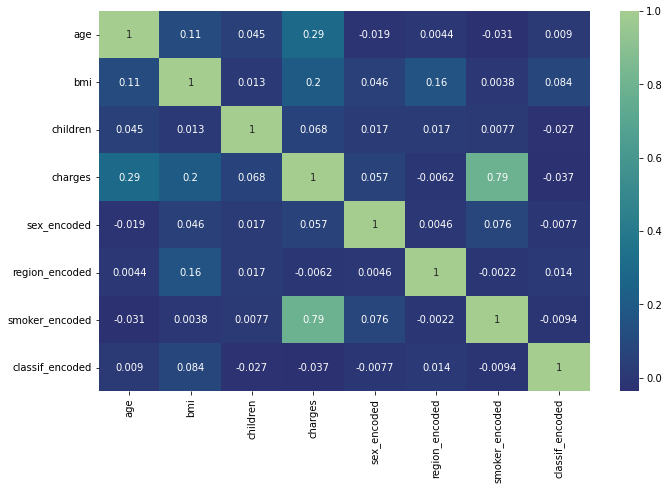

In [ ]:
plt.figure(figsize=(11,7))
sb.heatmap(data=correlation,annot=True,cmap ='crest_r')

# Conclusion:
 Here we can observe that target variable charges highly correlated to smoker encoded that is smoker with max correlation of 79 % after that comes age with 27 % and 20% correlation with bmi 

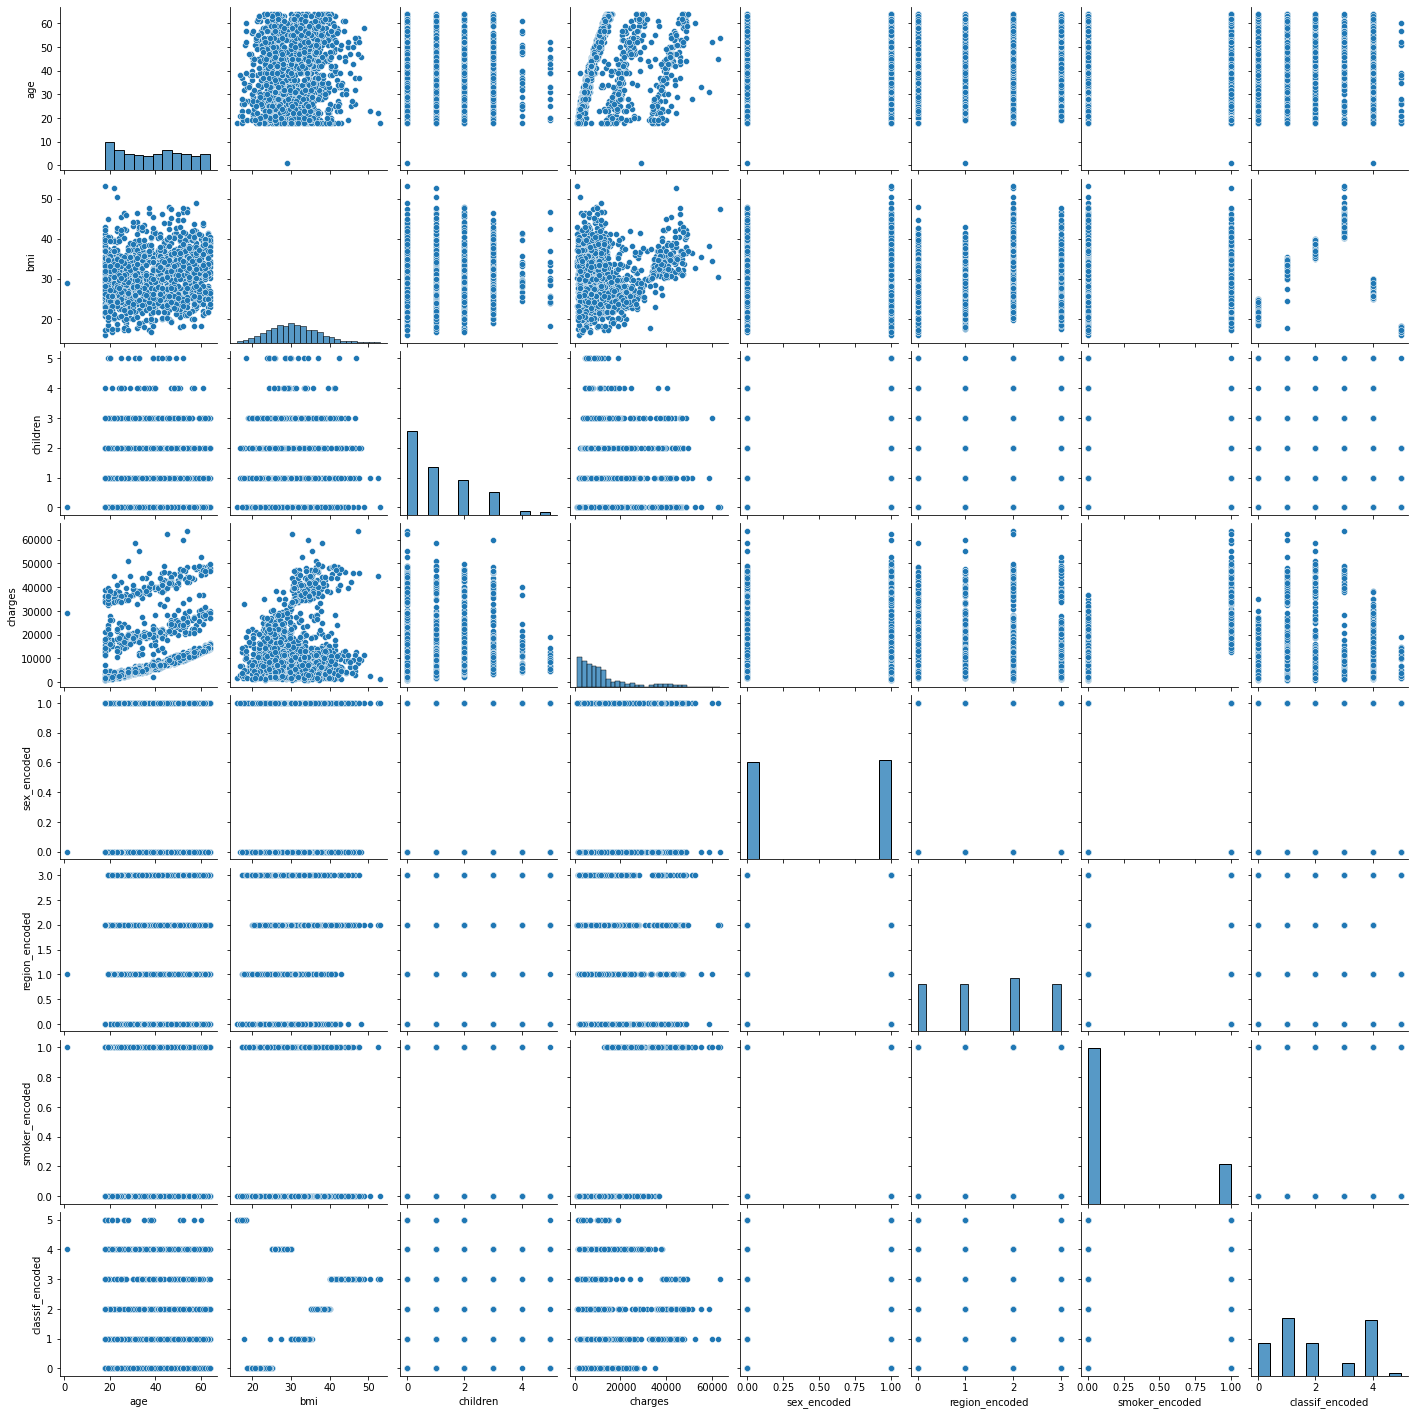

In [ ]:
sb.pairplot(df)
plt.show()

# Conclusion:
Here we can see plots between different numeric columns,but further we will do detailed analysis.

# Univariate  anaylsis

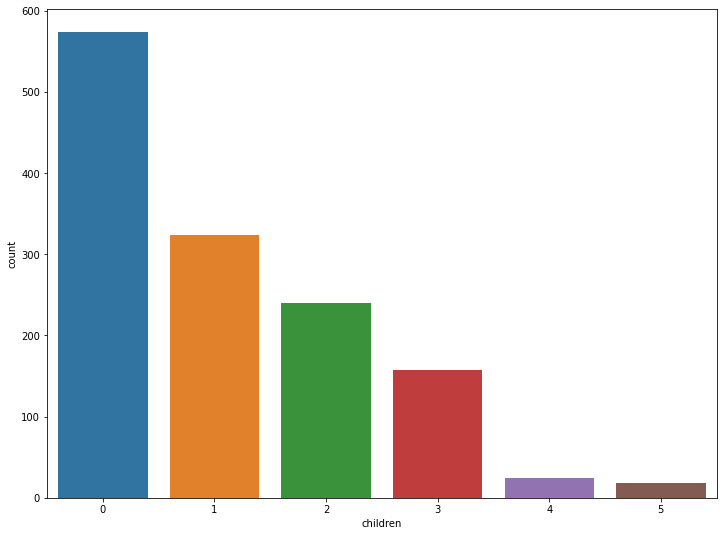

In [ ]:
plt.figure(figsize=(12,9))
sb.countplot(df['children'])
plt.show()

#Conclusion:
people with no children in the dataset.

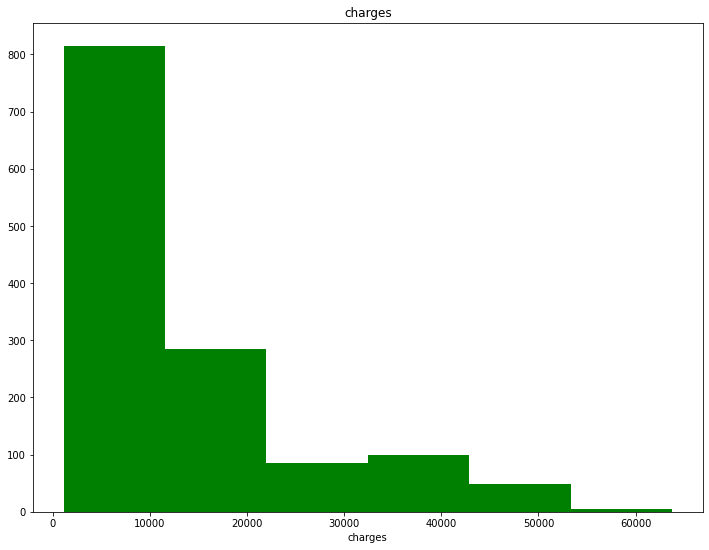

In [ ]:
plt.figure(figsize=(12,9))
plt.hist(df['charges'],bins=6,rwidth=0.999,color='g')
plt.title('charges')
plt.xlabel('charges')
plt.show()

# Conclusion:
 Here most of policy are charged between 1121 to 10000

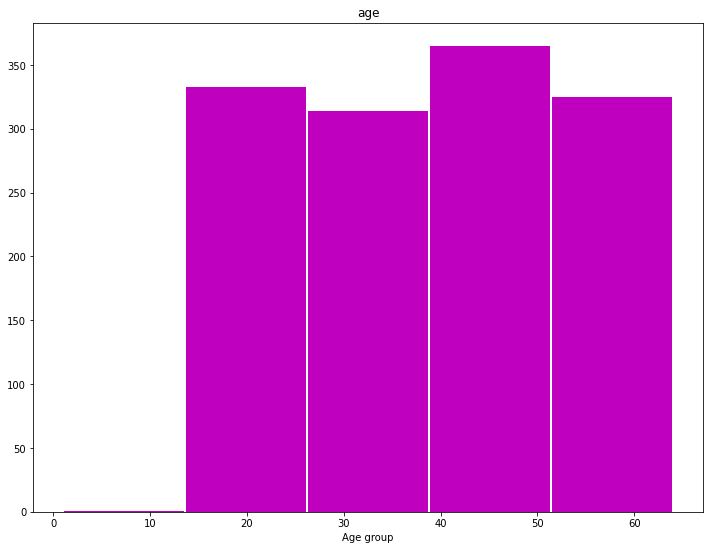

In [ ]:
plt.figure(figsize=(12,9))
plt.hist(df['age'],bins=5,rwidth=0.99,color='m')
plt.title('age')
plt.xlabel('Age group')
plt.show()

# Conclusion:
Here we can see that most of the people are from age group 40 to 50.

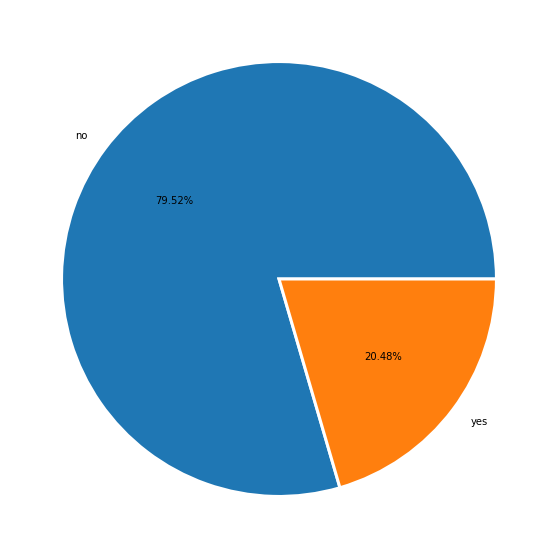

In [ ]:
plt.figure(figsize=(20,10))
A1=df["smoker"].value_counts()
B1=list(df["smoker"].value_counts().index)
plt.pie(A1,labels=B1,autopct='%.2f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' } )
plt.show()

# Conclusion:
There are more number of non-smoker then smoker.

# Bivariate anaylsis

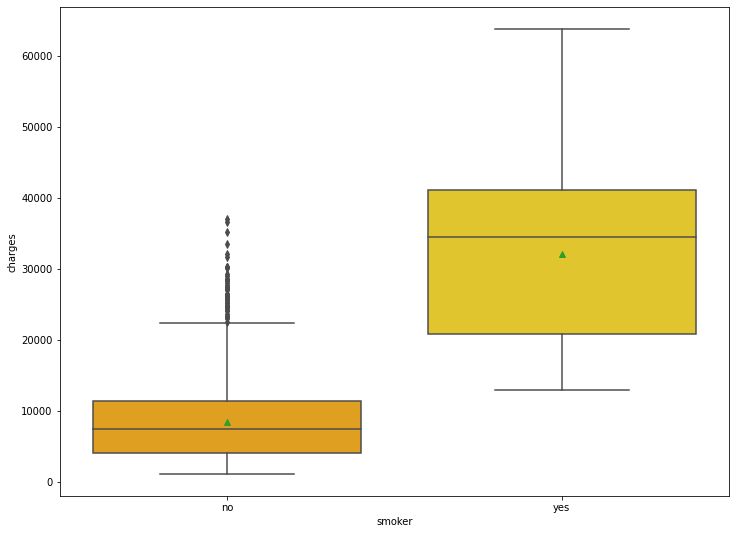

In [ ]:
plt.figure(figsize=(12,9))
sb.boxplot(data=df,x='smoker',y='charges',showmeans=True,palette='Wistia_r')
plt.show()

# Conclusion:
The average price of premium is high for smokers compared non-smokers

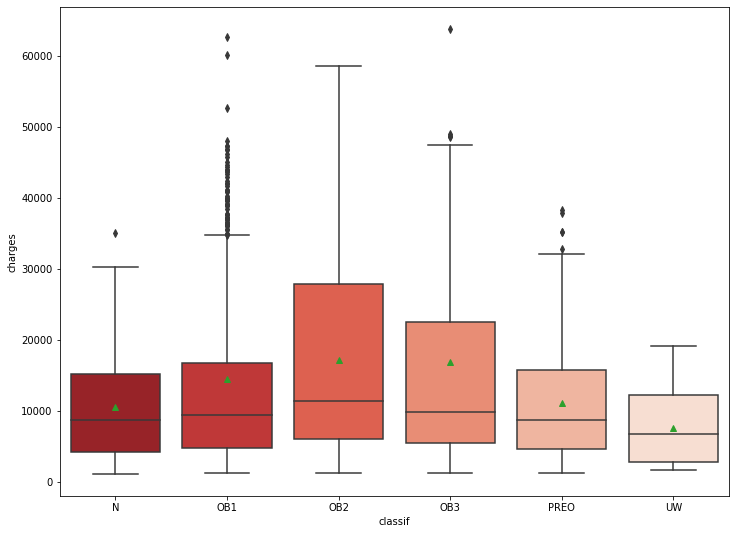

In [ ]:
plt.figure(figsize=(12,9))
sb.boxplot(data=df,x='classif',y='charges',showmeans=True,palette='Reds_r')
plt.show()

# Conclusion:
The average price of insurance policy  for OB2 and OB3 that is obesity level 2 and 3 is high compared to other Obesity level.

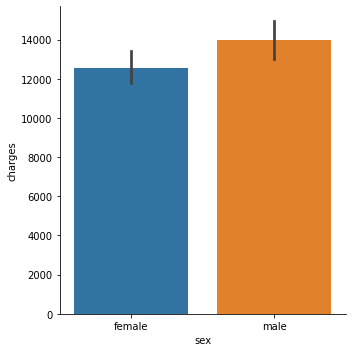

In [ ]:
sb.factorplot(x ='sex', y ='charges', data = df, kind ='bar')
plt.show()

# Conclusion:
Policy charge for a male is high compared to female.

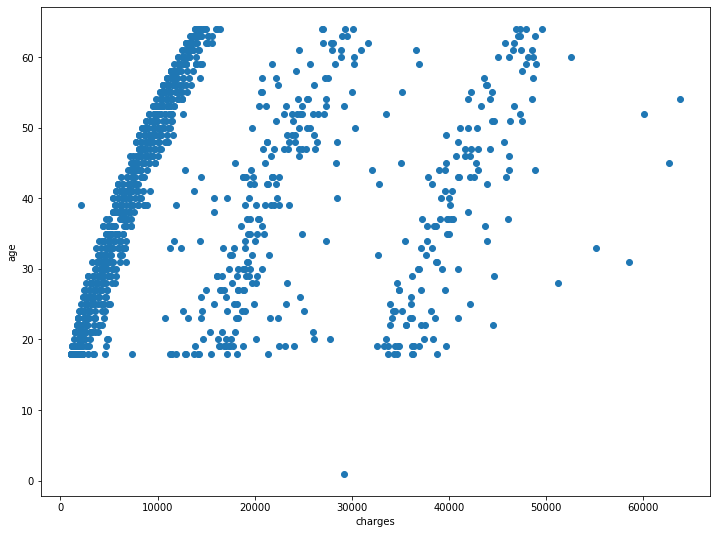

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(df["charges"],df["age"])
plt.xlabel('charges')
plt.ylabel('age')
plt.show()

# Conclusion:
We can see there is slight  change in policy charge as the age is increases.

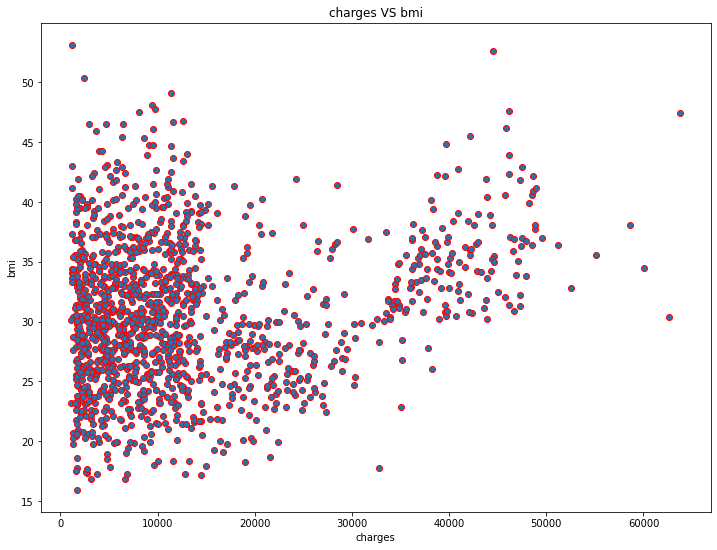

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(df["charges"],df["bmi"],edgecolors='r')
plt.title('charges VS bmi')
plt.xlabel('charges')
plt.ylabel('bmi')
plt.show()

# Conclusion:
 we can see that there is much change in policy charges with increase in bmi.

In [ ]:
def plot_desity_2d(df, cols, col_y = 'charges', kind ='kde'):
    for col in cols:
        sb.set_style("whitegrid")
        sb.jointplot(col, col_y, data=df, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

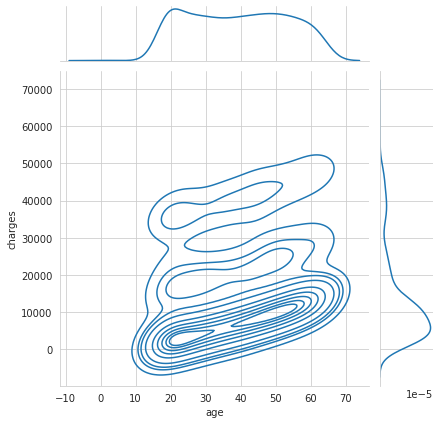

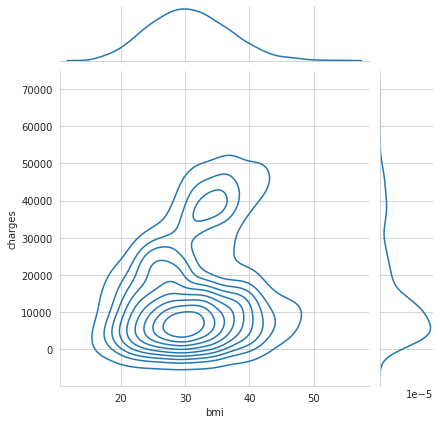

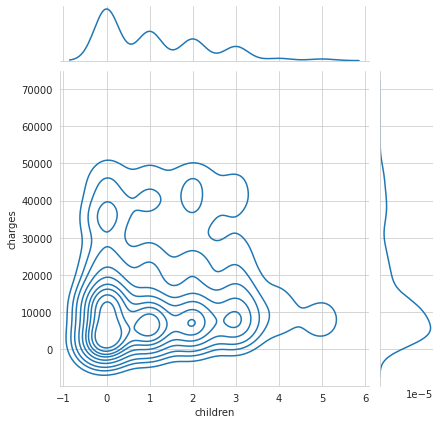

In [ ]:
plot_desity_2d(df,df_num_data.iloc[:,:-1])

# Conclusion:
Here we can see the density for all numerical columns with respect to charges 

# Final Conclusion:
From we can conclude whether a Person is a smoker or not the ,Premium charges highly depend on this.

 Also Features like Bmi , Age play an important factor.

# Splitting the dataset.

In [ ]:
df

,age,sex,bmi,classif,children,smoker,region,charges,sex_encoded,region_encoded,smoker_encoded,classif_encoded
0,19,female,27.900,PREO,0,yes,southwest,16884.92400,0,3,1,4
1,18,male,33.770,OB1,1,no,southeast,1725.55230,1,2,0,1
2,28,male,33.000,OB1,3,no,southeast,4449.46200,1,2,0,1
3,39,male,22.705,N,0,no,northwest,21984.47061,1,1,0,0
4,32,male,28.880,PREO,0,no,northwest,3866.85520,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830,1,1,0,1
1334,18,female,31.920,OB1,0,no,northeast,2205.98080,0,0,0,1
1335,18,female,36.850,OB2,0,no,southeast,1629.83350,0,2,0,2
1336,21,female,25.800,PREO,0,no,southwest,2007.94500,0,3,0,4


In [ ]:
scaled_df

,age,bmi,children,charges,sex_encoded,region_encoded,smoker_encoded,classif_encoded
0,0.285714,0.321227,0.0,0.251611,0.0,1.000000,1.0,0.8
1,0.269841,0.479150,0.2,0.009636,1.0,0.666667,0.0,0.2
2,0.428571,0.458434,0.6,0.053115,1.0,0.666667,0.0,0.2
3,0.603175,0.181464,0.0,0.333010,1.0,0.333333,0.0,0.0
4,0.492063,0.347592,0.0,0.043816,1.0,0.333333,0.0,0.8
...,...,...,...,...,...,...,...,...
1333,0.777778,0.403820,0.6,0.151299,1.0,0.333333,0.0,0.2
1334,0.269841,0.429379,0.0,0.017305,0.0,0.000000,0.0,0.2
1335,0.269841,0.562012,0.0,0.008108,0.0,0.666667,0.0,0.4
1336,0.317460,0.264730,0.0,0.014144,0.0,1.000000,0.0,0.8


As observed from correlation features which are highly correlated are smoker,age and bmi.

First check the with one and muiltiple features. 


# Simple Linear regression.

 Since smoker was showing high correlation taking first that .

In [ ]:
X=scaled_df['smoker_encoded']
y=scaled_df[['charges']]

In [ ]:
x_Train,x_Test,y_Train,y_Test=train_test_split(X,y,test_size=0.3,random_state=30)

In [ ]:
x_Train.shape

(936,)

In [ ]:
x_Test.shape

(402,)

In [ ]:
y_Train.shape

(936, 1)

In [ ]:
y_Test.shape

(402, 1)

In [ ]:
x_Train=x_Train.values.reshape(-1,1)
y_Train=y_Train.values.reshape(-1,1)
x_Test=x_Test.values.reshape(-1,1)

In [ ]:
s_model=LinearRegression().fit(x_Train,y_Train)

In [ ]:
coeffi_Determ_=s_model.score(x_Train,y_Train)

In [ ]:
Model1=coeffi_Determ_ # R^2 

In [ ]:
s_model.intercept_ # c intercept

array([0.11534811])

In [ ]:
s_model.coef_ # slope m

array([[0.37226068]])

In [ ]:
y_predict=s_model.predict(x_Test) 

In [ ]:
y_predict # y^ 

In [ ]:
Data=pd.DataFrame()
Data['Actual_y']=y_Test
Data['predict_y']=y_predict

In [ ]:
Data

,Actual_y,predict_y
338,0.651208,0.487609
620,0.040503,0.115348
965,0.057854,0.115348
128,0.504598,0.487609
329,0.128059,0.115348
...,...,...
659,0.211857,0.115348
893,0.687658,0.487609
584,0.001930,0.115348
1290,0.095964,0.115348


In [ ]:
MSE=mean_squared_error(y_Test,y_predict)
MAE=mean_absolute_error(y_Test,y_predict)
RMSE=mean_squared_error(y_Test,y_predict,squared=False)
print(MSE,MAE,RMSE)

0.012967133844326266 0.08627107465391169 0.11387332367295804


<Figure size 1152x648 with 0 Axes>

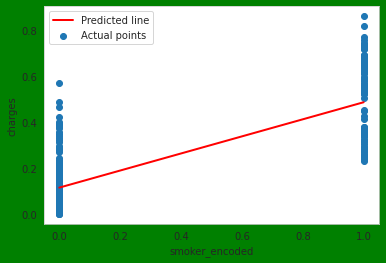

In [ ]:
plt.figure(figsize=(16,9))
plt.figure(facecolor='Green')
plt.scatter(x_Test,y_Test ,label='Actual points')
plt.plot(x_Test, y_predict, color="red", linewidth=2,label='Predicted line')
plt.xlabel('smoker_encoded')
plt.ylabel('charges')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print('R2 for Model1:',Model1)

R2 for Model1: 0.607061549563315


# So Here the predicted value show linear progress while the actual values are perfectly distinguished for smoker and smoker so that means model can be improved.
# Also we see the Model 1 is 60% accurate.

# Now  we take features smoker_encoded','age'.

In [ ]:
X1=scaled_df[['smoker_encoded','age']]
y1=scaled_df['charges']

In [ ]:
X_1_Train,X_1_Test,y1_Train,y1_Test=train_test_split(X1,y1,test_size=0.3,random_state=30)

In [ ]:
X_1_Train.shape

(936, 2)

In [ ]:
X_1_Test.shape

(402, 2)

In [ ]:
y1_Train.shape

(936,)

In [ ]:
y1_Test.shape

(402,)

In [ ]:
s_model1=LinearRegression().fit(X_1_Train,y1_Train)

In [ ]:
coeffi_Determ1_=s_model1.score(X_1_Train,y1_Train) # R^2

In [ ]:
Model2=coeffi_Determ1_# R^2

In [ ]:
s_model1.intercept_ # C intercept

-0.05820522146328949

In [ ]:
s_model1.coef_ # m slope

array([0.37724414, 0.2872645 ])

In [ ]:
y_predict1=s_model1.predict(X_1_Test)

In [ ]:
y_predict1

array([0.54246686, 0.07402764, 0.09682641, 0.46039129, 0.17434223,
       0.0785874 , 0.0193106 , 0.16522272, 0.51966809, 0.20626051,
       0.12418494, 0.16066297, 0.5287876 , 0.18346174, 0.0193106 ,
       0.60630342, 0.16066297, 0.14698371, 0.47863031, 0.15610322,
       0.02387035, 0.09682641, 0.16978248, 0.14242395, 0.53334735,
       0.60630342, 0.18346174, 0.09226666, 0.12418494, 0.17434223,
       0.05122887, 0.44671203, 0.04210937, 0.17890198, 0.21082026,
       0.09682641, 0.03754961, 0.11962518, 0.02387035, 0.11506543,
       0.0785874 , 0.55614612, 0.05122887, 0.20170075, 0.12418494,
       0.40111449, 0.0785874 , 0.0193106 , 0.04666912, 0.03754961,
       0.13330445, 0.15610322, 0.20626051, 0.03754961, 0.12418494,
       0.1378642 , 0.49230957, 0.11506543, 0.21082026, 0.05578863,
       0.19258125, 0.12418494, 0.16522272, 0.09226666, 0.02387035,
       0.07402764, 0.16522272, 0.05122887, 0.09682641, 0.20170075,
       0.21993977, 0.0284301 , 0.0284301 , 0.15154346, 0.22449

In [ ]:
Data1=pd.DataFrame()
Data1['Actual_y']=y1_Test
Data1['predict_y']=y_predict1

In [ ]:
Data1

,Actual_y,predict_y
338,0.651208,0.542467
620,0.040503,0.074028
965,0.057854,0.096826
128,0.504598,0.460391
329,0.128059,0.174342
...,...,...
659,0.211857,0.197141
893,0.687658,0.528788
584,0.001930,0.023870
1290,0.095964,0.110506


In [ ]:
MSE1=mean_squared_error(y1_Test,y_predict1)
MAE1=mean_absolute_error(y1_Test,y_predict1)
RMSE1=mean_squared_error(y1_Test,y_predict1,squared=False)
print(MSE1,MAE1,RMSE1)

0.009953112131839782 0.06468726163219493 0.09976528520402166


In [ ]:
print('R2 for Model2:',Model2)   

R2 for Model2: 0.7173462645436071


# Here we can see that Model 2 is 71 % this means adding more features improve them model.

# Taking three features now.

In [ ]:
X2=scaled_df[['smoker_encoded','age','bmi']]
y2=scaled_df['charges']

In [ ]:
X_2_Train,X_2_Test,y2_Train,y2_Test=train_test_split(X2,y2,test_size=0.3,random_state=30)

In [ ]:
X_2_Train.shape

(936, 3)

In [ ]:
X_2_Test.shape

(402, 3)

In [ ]:
y2_Train.shape

(936,)

In [ ]:
y2_Test.shape

(402,)

In [ ]:
s_model2=LinearRegression().fit(X_2_Train,y2_Train)

In [ ]:
coeffi_Determ2_=s_model2.score(X_2_Train,y2_Train) 

In [ ]:
Model3=coeffi_Determ2_ # R^2

In [ ]:
s_model2.intercept_ # C intercept

-0.12349470192487089

In [ ]:
s_model2.coef_ # m slope

array([0.37756058, 0.27344037, 0.1859264 ])

In [ ]:
y_predict2=s_model2.predict(X_2_Test)

In [ ]:
Data2=pd.DataFrame()
Data2['Actual_y']=y2_Test
Data2['predict_y']=y_predict2

In [ ]:
Data2

,Actual_y,predict_y
338,0.651208,0.548475
620,0.040503,0.079606
965,0.057854,0.079799
128,0.504598,0.397645
329,0.128059,0.201604
...,...,...
659,0.211857,0.183715
893,0.687658,0.568668
584,0.001930,-0.021659
1290,0.095964,0.057055


In [ ]:
MSE2=mean_squared_error(y2_Test,y_predict2)
MAE2=mean_absolute_error(y2_Test,y_predict2)
RMSE2=mean_squared_error(y2_Test,y_predict2,squared=False)
print(MSE2,MAE2,RMSE2)

0.008900585090701062 0.06564665100792748 0.09434291224411648


In [ ]:
print('R2 for Model3:',Model3)   

R2 for Model3: 0.7421669566580806


In [ ]:
print(Model1,Model2,Model3)

0.607061549563315 0.7173462645436071 0.7421669566580806


# Conclusion:
So we conclude that Model3 will be the best option to consider since because the coefficient of detemination is high ,so the error value will be low compared to other model.

# Decision Tree Regression.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X3=scaled_df[['smoker_encoded','age','bmi']]
y3=scaled_df['charges']

In [ ]:
X3_Train,X3_Test,y3_Train,y3_Test=train_test_split(X3,y3,test_size=0.3,random_state=30)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')


In [ ]:
from sklearn import tree
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 42), X3, y3, cv= kf,scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())

For max depth: 1
rmse= 0.12
For max depth: 2
rmse= 0.08
For max depth: 3
rmse= 0.08
For max depth: 4
rmse= 0.08
For max depth: 5
rmse= 0.08
For max depth: 6
rmse= 0.09
For max depth: 7
rmse= 0.09
For max depth: 8
rmse= 0.09
For max depth: 9
rmse= 0.10
For max depth: 10
rmse= 0.10
For max depth: 11
rmse= 0.10
For max depth: 12
rmse= 0.10
For max depth: 13
rmse= 0.11
For max depth: 14
rmse= 0.11
For max depth: 15
rmse= 0.11


# Here we are checking for the good max depth after applying 4 gives us Less neg_mean_squared_error so included it 

In [ ]:
X3_Train.shape

(936, 3)

In [ ]:
y3_Train.shape

(936,)

In [ ]:
X3_Test.shape

(402, 3)

In [ ]:
y3_Test.shape

(402,)

In [ ]:
dtm = DecisionTreeRegressor(max_depth=4,min_samples_split=4,max_leaf_nodes=10)
dtm.fit(X3_Train,y3_Train)
print("R-Squared on train dataset={}".format(dtm.score(X3_Train,y3_Train)))
dtm.fit(X3_Test,y3_Test)
print("R-Squaredon test dataset={}".format(dtm.score(X3_Test,y3_Test)))

R-Squared on train dataset=0.8657380569189801
R-Squaredon test dataset=0.8605464882770948


In [ ]:
Model4 = dtm.score(X3_Train,y3_Train)


In [ ]:
Model4

0.8418196820692206

In [ ]:
print('R2 for Model4:',Model4)   

R2 for Model4: 0.8418196820692206


In [ ]:
print(Model1,Model2,Model3)

0.607061549563315 0.7173462645436071 0.7421669566580806


In [ ]:
Model_R2=pd.DataFrame()

In [ ]:
Model_R2['LT_Model1']=['0.607']
Model_R2['LT_Model2']=['0.717']
Model_R2['LT_Model3']=['0.742']
Model_R2['DT_Model']=['0.841']

In [ ]:
Model_R2

,LT_Model1,LT_Model2,LT_Model3,DT_Model
0,0.607,0.717,0.742,0.841


#Conclusion:

Here we can see the Decisian tree model has th highest R2.

In [ ]:
y_predict3=dtm.predict(X3_Test)

In [ ]:
y3_Test.shape

(402,)

In [ ]:
y_predict3

array([0.64915646, 0.06165092, 0.1141047 , 0.50459764, 0.17121309,
       0.06165092, 0.06165092, 0.17121309, 0.64915646, 0.21774465,
       0.1141047 , 0.17121309, 0.64915646, 0.17121309, 0.06165092,
       0.39764264, 0.17121309, 0.1141047 , 0.28144596, 0.17121309,
       0.06165092, 0.1141047 , 0.17121309, 0.1141047 , 0.39764264,
       0.73064121, 0.17121309, 0.06165092, 0.1141047 , 0.17121309,
       0.06165092, 0.64915646, 0.06165092, 0.17121309, 0.21774465,
       0.1141047 , 0.06165092, 0.1141047 , 0.06165092, 0.1141047 ,
       0.06165092, 0.39764264, 0.06165092, 0.17121309, 0.1141047 ,
       0.57020343, 0.06165092, 0.06165092, 0.06165092, 0.06165092,
       0.1141047 , 0.17121309, 0.21774465, 0.06165092, 0.1141047 ,
       0.1141047 , 0.28144596, 0.1141047 , 0.21774465, 0.06165092,
       0.17121309, 0.1141047 , 0.17121309, 0.06165092, 0.06165092,
       0.06165092, 0.17121309, 0.06165092, 0.1141047 , 0.17121309,
       0.21774465, 0.06165092, 0.06165092, 0.1141047 , 0.21774

In [ ]:
MSE3=mean_squared_error(y3_Test,y_predict3)
MAE3=mean_absolute_error(y3_Test,y_predict3)
RMSE3=mean_squared_error(y3_Test,y_predict3,squared=False)
print(MSE3,MAE3,RMSE3)

0.005149448941744988 0.04267673242555213 0.07175966096453486


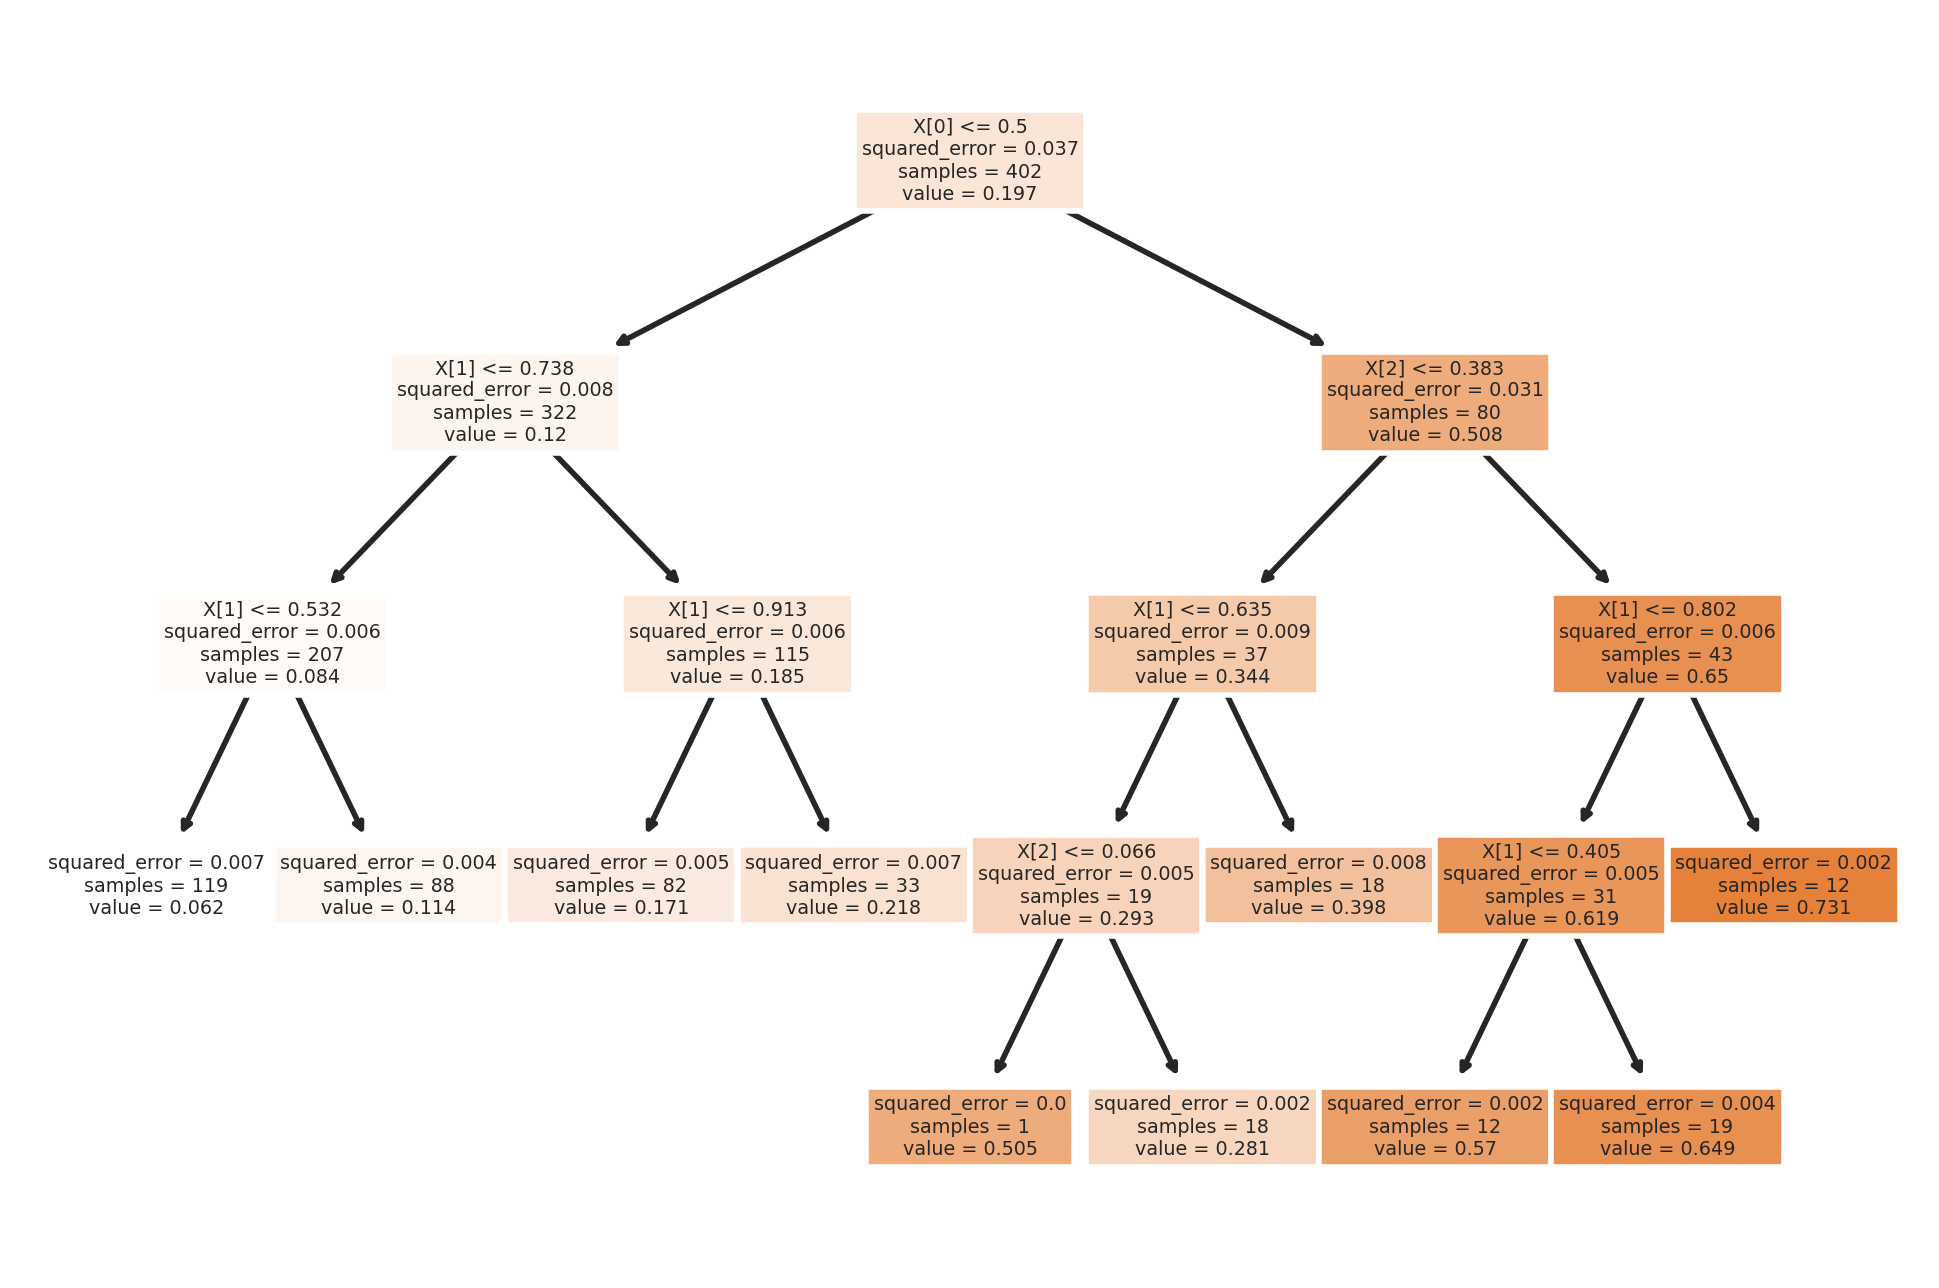

In [ ]:
 # Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(dpi=400)
tree.plot_tree(dtm,
 filled = True);
#save figure in current directory as png
fig.savefig('HR.png')

# Here we can see that Age that is index[0] is Divide into two parts bmi index[1] and children index [2] under condition <0.5 and so on till max depth 4.

In [ ]:
scaled_df

,age,bmi,children,charges,sex_encoded,region_encoded,smoker_encoded,classif_encoded
0,0.285714,0.321227,0.0,0.251611,0.0,1.000000,1.0,0.8
1,0.269841,0.479150,0.2,0.009636,1.0,0.666667,0.0,0.2
2,0.428571,0.458434,0.6,0.053115,1.0,0.666667,0.0,0.2
3,0.603175,0.181464,0.0,0.333010,1.0,0.333333,0.0,0.0
4,0.492063,0.347592,0.0,0.043816,1.0,0.333333,0.0,0.8
...,...,...,...,...,...,...,...,...
1333,0.777778,0.403820,0.6,0.151299,1.0,0.333333,0.0,0.2
1334,0.269841,0.429379,0.0,0.017305,0.0,0.000000,0.0,0.2
1335,0.269841,0.562012,0.0,0.008108,0.0,0.666667,0.0,0.4
1336,0.317460,0.264730,0.0,0.014144,0.0,1.000000,0.0,0.8


# Using Cross validation checking which model is best.

# Baseline: Linear regression (For comparison)

In [ ]:
X2=scaled_df[['smoker_encoded','age','bmi']]
y2=scaled_df['charges']

In [ ]:
results, names = list(), list()

In [ ]:
from numpy import mean
from numpy import std


In [ ]:
model = LinearRegression()

# evaluate the model
cv = KFold(n_splits=3, shuffle=True, random_state=42)
n_scores = cross_val_score(model, X2, y2, scoring='r2', cv=cv, n_jobs=-1, error_score='raise' )

results.append(n_scores)
names.append('LR')

# report performance

print('R2 Score: %.3f (%.3f)' % (round(mean(n_scores),2), std(n_scores)))

R2 Score: 0.750 (0.025)


# Decision Tree (For Comaparison)

In [ ]:
model1 = DecisionTreeRegressor()

# evaluate the model
cv = KFold(n_splits=3, shuffle=True, random_state=42)
n_scores1 = cross_val_score(model1, X2, y2, scoring='r2', cv=cv, n_jobs=-1, error_score='raise' )

results.append(n_scores1)
names.append('DT')

# report performance
print('R2 Score: %.3f (%.3f)' % (round(mean(n_scores1),2), std(n_scores1)))

R2 Score: 0.700 (0.031)


# Bagging with Random Forest (For comparison)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# define the model
model2 = RandomForestRegressor()

# evaluate the model
cv = KFold(n_splits=3, shuffle=True, random_state=42)
n_scores2 = cross_val_score(model2, X2, y2, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores2)
names.append('rf')

# report performance
print('R2 Score: %.3f (%.3f)' % (round(mean(n_scores2),2), std(n_scores2)))

R2 Score: 0.810 (0.025)


# Boosting with Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
# define the model
model3 = AdaBoostRegressor()

# evaluate the model
cv = KFold(n_splits=3, shuffle=True, random_state=42)
n_scores3 = cross_val_score(model3, X2, y2, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores3)
names.append('ada')


# report performance
print('R2 Score: %.3f (%.3f)' % (round(mean(n_scores3),2), std(n_scores3)))

R2 Score: 0.810 (0.022)


 # Stacking

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor 

In [ ]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model

In [ ]:
# define the model
model4 = get_stacking()

# evaluate the model
cv = KFold(n_splits=3, shuffle=True, random_state=42)
n_scores4 = cross_val_score(model4, X2,  y2, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores4)
names.append('stacking')


# report performance
print('R2 Score: %.3f (%.3f)' % (round(mean(n_scores4),2), std(n_scores4)))

R2 Score: 0.840 (0.025)


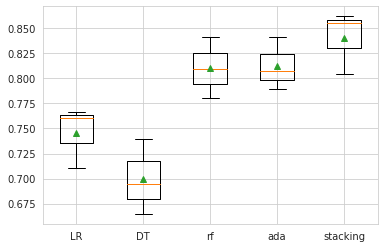

In [ ]:
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
R2_score=pd.DataFrame()

In [ ]:
R2_score['r2_LR']=['0.750']
R2_score['r2_DT']=['0.700']
R2_score['r2_rf']=['0.810']
R2_score['r2_ada']=['0.800']
R2_score['r2_stacking']=['0.840']

In [ ]:
R2_score

,r2_LR,r2_DT,r2_rf,r2_ada,r2_stacking
0,0.750,0.700,0.810,0.800,0.840


# Conclusion:

# Here we can conclude that the best model for regression problem for this dataset is stacking algorithm.